<a href="https://colab.research.google.com/github/haruka20010217/test/blob/master/6_4%E3%82%BC%E3%83%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip --no-cache-dir install opencv-python==4.4.0.44

     |████████████████████████████████| 49.5MB 1.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [3]:
# 各種インポート
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 画像の読み込み
tokyo_tower = cv2.imread('tokyo_tower.png')
print(type(tokyo_tower))

<class 'numpy.ndarray'>


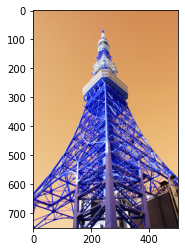

In [5]:
# ひとまず画像を表示してみる（間違い。色合いがおかしい）
plt.imshow(tokyo_tower)

In [6]:
# BGRの画像をRGBに変換
rgb_tower = cv2.cvtColor(tokyo_tower, cv2.COLOR_BGR2RGB)

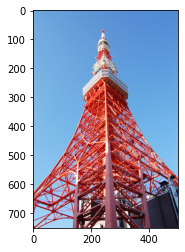

In [8]:
plt.imshow(rgb_tower)

In [9]:
# グレースケールで読み込む
gray_tower = cv2.imread('tokyo_tower.png', cv2.IMREAD_GRAYSCALE)

In [10]:
# すでに読み込んだものをグレースケール化する
gray_tower02 = cv2.cvtColor(tokyo_tower, cv2.COLOR_BGR2GRAY)

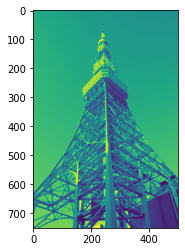

In [11]:
plt.imshow(gray_tower)

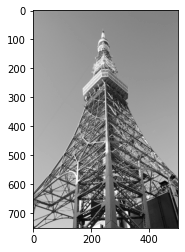

In [12]:
plt.imshow(gray_tower, cmap='gray')

In [13]:
cv2.imwrite('tokyo_tower_gray.png', gray_tower)

True

In [14]:
cv2.imwrite('tokyo_tower_copy.png', tokyo_tower)

True

In [15]:
cv2.imwrite('tokyo_tower_copy_ng.png', rgb_tower)

True